In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression


# Loading the file

In [2]:
df=pd.read_excel('iris (2).xls')
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.shape

(150, 5)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [6]:
df.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

# Handling NaNs and outliers

In [7]:
df['SL'].median()

5.8

In [8]:
df['SL'].mean()

5.8559440559440565

In [9]:
mean_sl=df['SL'].mean()

In [10]:
df['SL']=df['SL'].fillna(mean_sl)

In [11]:
df['SW'].median()

3.0

In [12]:
df['SW'].mean()

3.0493055555555566

In [13]:
mean_sw=df['SW'].mean()

In [14]:
df['SW']=df['SW'].fillna(mean_sw)

In [15]:
df['PL'].median()

4.35

In [16]:
df['PL'].mean()

3.756250000000003

<AxesSubplot:xlabel='PL', ylabel='Count'>

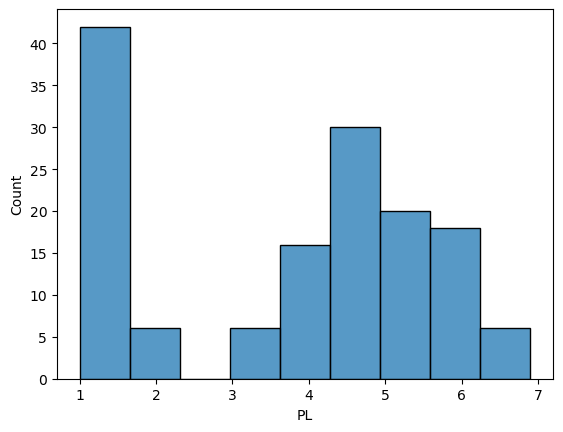

In [17]:
sns.histplot(df['PL'])

In [18]:
df['PL'].skew()

-0.2689053923783847

In [19]:
df2=df.drop('Classification',axis=1)

In [20]:
median_pl=df['PL'].median()

In [21]:
df['PL']=df['PL'].fillna(median_pl)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [23]:
z_score_SL=np.abs(stats.zscore(df['SL']))
z_score_SL

0      9.381508e-01
1      1.186357e+00
2      1.102258e-15
3      1.558667e+00
4      1.062254e+00
           ...     
145    1.047500e+00
146    5.510876e-01
147    7.992941e-01
148    4.269844e-01
149    5.467484e-02
Name: SL, Length: 150, dtype: float64

In [24]:
out_index_SL=np.where(z_score_SL>3)
print(out_index_SL[0])

[]


In [25]:
z_score_SW=np.abs(stats.zscore(df['SW']))
z_score_SW

0      1.071869
1      0.117261
2      0.358391
3      0.120565
4      1.309695
         ...   
145    0.117261
146    1.306392
147    0.117261
148    0.834043
149    0.117261
Name: SW, Length: 150, dtype: float64

In [26]:
out_index_SW=np.where(z_score_SW>3)
print(out_index_SW[0])

[15]


In [27]:
df=df.drop(out_index_SW[0])
df.shape

(149, 5)

In [28]:
z_score_PL=np.abs(stats.zscore(df['PL']))
z_score_PL

0      1.393234
1      1.393234
2      1.451399
3      1.335068
4      1.393234
         ...   
145    0.817046
146    0.700716
147    0.322642
148    0.933377
149    0.758881
Name: PL, Length: 149, dtype: float64

In [29]:
out_index_PL=np.where(z_score_PL>3)
print(out_index_PL[0])

[]


In [30]:
z_score_PW=np.abs(stats.zscore(df['PW']))
z_score_PW

0      1.320511
1      1.320511
2      1.320511
3      1.320511
4      1.320511
         ...   
145    1.441440
146    0.915354
147    1.046876
148    1.441440
149    0.783833
Name: PW, Length: 149, dtype: float64

In [31]:
out_index_PW=np.where(z_score_PW>3)
print(out_index_PW[0])

[]


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              149 non-null    float64
 1   SW              149 non-null    float64
 2   PL              149 non-null    float64
 3   PW              149 non-null    float64
 4   Classification  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


#Classification models

In [33]:
x=df.drop(['Classification'], axis=1)
y= df['Classification']



In [34]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=1)

##Logistic Regression

In [35]:
lr = LogisticRegression(max_iter=5000)
lr.fit(x_train, y_train)
y_pred1 = lr.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(y_pred1)

0.9666666666666667
['Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica']


In [36]:
cm=confusion_matrix(y_pred1,y_test)
cm

array([[10,  0,  0],
       [ 0, 13,  1],
       [ 0,  0,  6]], dtype=int64)

##KNN

In [37]:
knn = KNeighborsClassifier(n_neighbors=7)

In [46]:
knn.fit(x_train,y_train)
y_pred2 = knn.predict(x_test)
accuracy_score(y_test,y_pred2)

E:\Conda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9666666666666667

##DecisionTreeClassifier

In [39]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
model.score(x_test,y_test)

0.9666666666666667

##Random forest classifier

In [40]:
model_RFC=RandomForestClassifier()
model_RFC.fit(x_train,y_train)
y_pred=model_RFC.predict(x_test)
model_RFC.score(x_test,y_test)

0.9666666666666667

##SVC

In [44]:
model_SVC=SVC()
model_SVC.fit(x_train,y_train)
y_pred=model_SVC.predict(x_test)
model_SVC.score(x_test,y_test)

0.9666666666666667